In [1]:
%matplotlib inline
import pylab 
pylab.rcParams['figure.figsize'] = (15, 10)

import os
import json
import matplotlib.pyplot as plt
import numpy as np

from alignednotemodel.PitchDistribution import hz_to_cent, cent_to_hz
from alignednotemodel import alignednotemodel

import pdb

In [2]:
folder = 'ussak--sazsemaisi--aksaksemai----dede_salih_efendi'
pitchfile = os.path.join(folder, 'pitch_corrected.json')
notefile = os.path.join(folder, 'alignedNotes.json')
tonicfile = os.path.join(folder, 'tonic.json')
tuningfile = os.path.join(folder, 'tuning.json')

modelsavefile = os.path.join(folder, 'noteModels.json')

In [3]:
pitch = json.load(open(pitchfile, 'r'))
alignednotes = json.load(open(notefile, 'r'))['notes']
tonic = json.load(open(tonicfile, 'r'))
tuning = json.load(open(tuningfile, 'r'))['scoreInformed']

In [4]:
noteModels, pitchDistibution, newTonic = alignednotemodel.getModels(pitch, alignednotes, tonic['scoreInformed'], 
                                                                    tuning, kernel_width=7.5)
json.dump(noteModels, open(modelsavefile, 'w'))

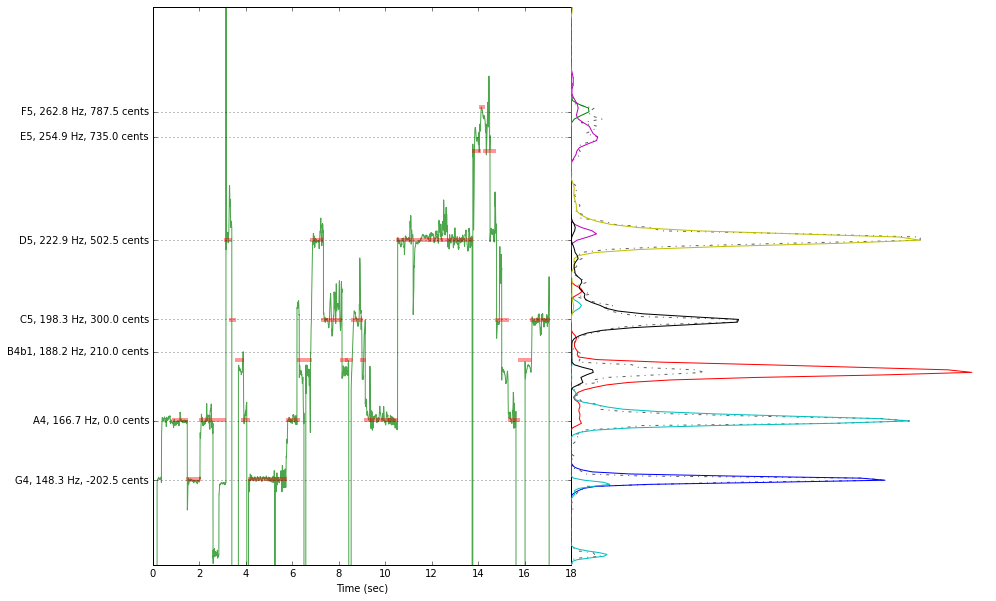

In [5]:
fig, (ax1, ax2) = alignednotemodel.plot(noteModels, pitchDistibution, alignednotes, pitch, tonic['scoreInformed'])
plt.show()

In [6]:
#for note in noteModels['C5']['notes']:
#    plt.plot(note['trajectory'][:,0], note['trajectory'][:,1])
#    plt.show()

In [7]:
#fig, ax = plt.subplots()
#ax.plot(pitchDistibution.bins, pitchDistibution.vals, '-.', color='#606060')
#for key in noteModels.keys():
#    ax.plot(noteModels[key]['distribution'].bins, noteModels[key]['distribution'].vals, label=key)
#legend = ax.legend(loc='upper right') 
#plt.show()